# Hypothesis 4:

During the covid epidemic, the crime preference location is significantly different from before

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
def load_boston_crime_group_by_street(filename):
    data = pd.read_csv(filename)
    data_street_year = data.groupby(['STREET']).size()
    data_street_year = data_street_year.reset_index()
    data_street_year.columns = ['street', 'crime_count']
    data_street_year.astype({'street':str})
    return data_street_year

boston_crime_by_street = load_boston_crime_group_by_street('data/boston_crime.csv')

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/1707801842.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


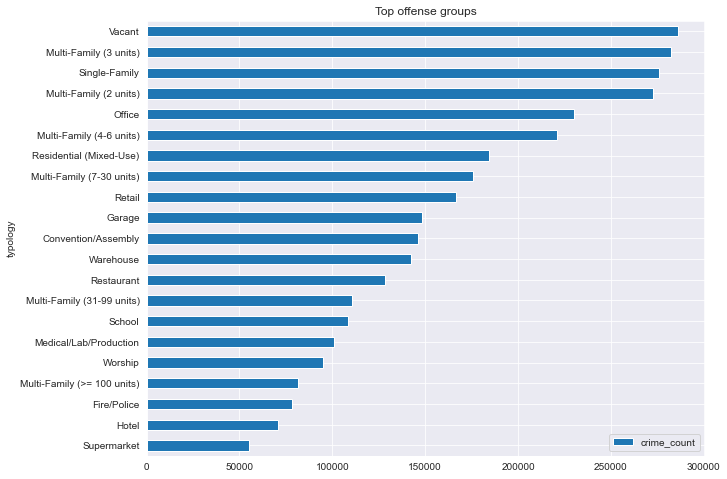

In [64]:
def plot_offense_group(file_path, crime_data):
    data = pd.read_csv(file_path)
    data.columns = ['st_loc', 'typology', 'count']
    data_crime = data.merge(crime_data, left_on='st_loc', right_on='street')
    data_crime_group = data_crime.groupby(['typology']).agg({'crime_count': 'sum'})
    data_crime_group.reset_index(inplace=True)
    data_crime_group.columns = ['typology', 'crime_count']
    data_crime_group.sort_values(by='crime_count', inplace=True)
    data_crime_group.plot.barh(x='typology', y='crime_count', figsize=(10, 8))
    plt.title('Top offense groups')
    return data

bldg_typology = plot_offense_group('prep_data/boston_bldg_by_building_typology.csv', boston_crime_by_street)

In [8]:
def boston_crime_per_year(filename):
    data = pd.read_csv(filename)
    data_street_per_year = data.groupby(['STREET', 'YEAR']).size()
    data_street_per_year = data_street_per_year.reset_index()
    data_street_per_year.columns = ['street', 'year', 'crime_count']
    return data_street_per_year

boston_crime_per_year = boston_crime_per_year('data/boston_crime.csv')

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/2242427688.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


In [9]:
boston_crime_per_year

,street,year,crime_count
0,ALBANY ST,2015,39
1,ALBANY ST,2016,3
2,BLUE HILL AVE,2015,2
3,BLUE HILL AVE,2016,1
4,BLUE HILL AVE,2017,4
...,...,...,...
20863,ZELLER ST,2018,2
20864,ZELLER ST,2019,2
20865,ZELLER ST,2020,1
20866,ZIEGLER,2019,1


In [11]:
def bldg_typology_crime_count_per_year(df_typology, df_boston_crime_street_per_year, year):
    crime_per_year = df_boston_crime_street_per_year[df_boston_crime_street_per_year.year == year]
    typology_crime = df_typology.merge(crime_per_year, left_on='st_loc', right_on='street')
    typology_crime_group = typology_crime.groupby(['typology']).agg({'crime_count': 'sum'})
    typology_crime_group.reset_index(inplace=True)
    typology_crime_group.columns = ['typology', year]
    return typology_crime_group


bldg_typology_2015 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2015)
bldg_typology_2015

,typology,2015
0,Convention/Assembly,14918
1,Fire/Police,7028
2,Garage,15531
3,Hotel,7259
4,Medical/Lab/Production,10098
5,Multi-Family (2 units),28962
6,Multi-Family (3 units),29605
7,Multi-Family (31-99 units),11494
8,Multi-Family (4-6 units),23448
9,Multi-Family (7-30 units),18483


In [17]:
bldg_typology_2016 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2016)
bldg_typology_2017 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2017)
bldg_typology_2018 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2018)
bldg_typology_2019 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2019)
bldg_typology_2020 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2020)

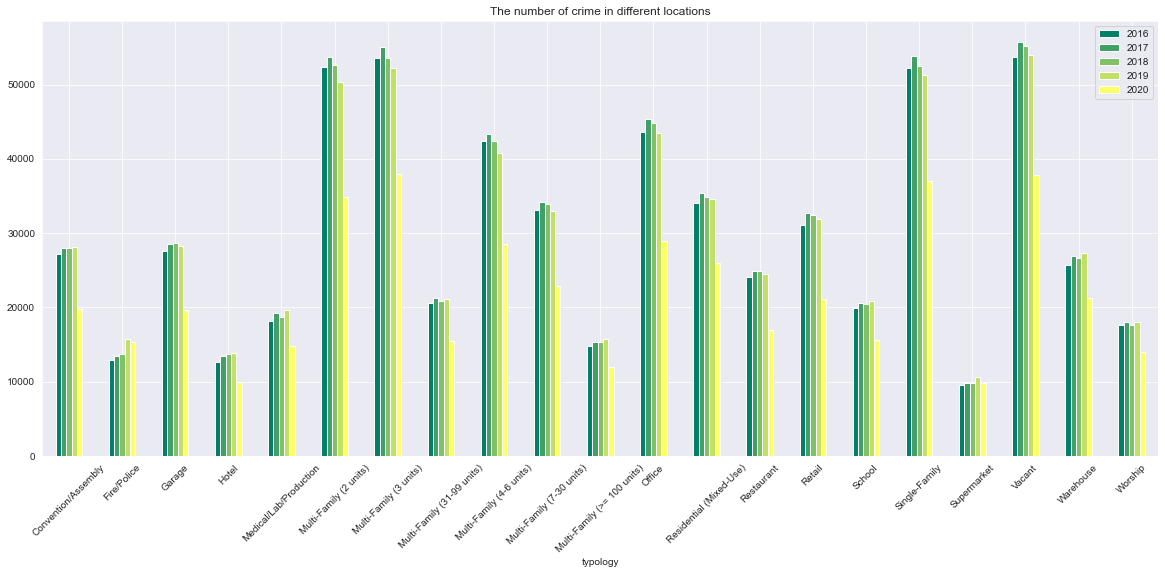

In [18]:
years = [bldg_typology_2016, bldg_typology_2017, bldg_typology_2018, bldg_typology_2019, bldg_typology_2020]

def plot_bldg(data):
    bldg_typology_years = pd.concat(data, axis=1)
    bldg_typology_years_1 = bldg_typology_years.iloc[:, [0, 1, 3, 5, 7, 9]]
    bldg_typology_years_1.plot.bar(x='typology', stacked=False, title='The number of crime in different locations',
                                   figsize=(20, 8), cmap='summer')
    plt.xticks(rotation=45)

plot_bldg(years)

In [27]:
bldg_typology_2015_perc = bldg_typology_2015.copy()
bldg_typology_2015_perc['2015_perc'] = bldg_typology_2015.iloc[:, 1] / sum(bldg_typology_2015.iloc[:, 1]) * 100
bldg_typology_2015_perc

,typology,2015,2015_perc
0,Convention/Assembly,14918,4.289555
1,Fire/Police,7028,2.020847
2,Garage,15531,4.465818
3,Hotel,7259,2.087269
4,Medical/Lab/Production,10098,2.903601
5,Multi-Family (2 units),28962,8.327798
6,Multi-Family (3 units),29605,8.512688
7,Multi-Family (31-99 units),11494,3.305010
8,Multi-Family (4-6 units),23448,6.742290
9,Multi-Family (7-30 units),18483,5.314643


In [85]:
def convert_to_perc(the_df):
    df_perc = the_df.copy()
    df_perc['perc'] = the_df.iloc[:, 1] / sum(the_df.iloc[:, 1]) * 100
    df_perc['year'] = the_df.columns[1]
    return df_perc[['typology', 'year', 'perc']]

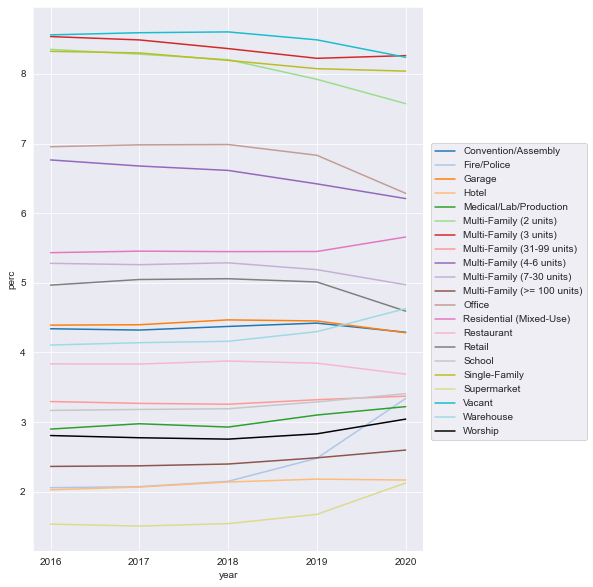

In [161]:
def plot_bldg_perc(the_years):
    df = pd.DataFrame(columns=['typology', 'year', 'perc'])
    for year in the_years:
        df = pd.concat([df, convert_to_perc(year)], axis=0)

    # df = df.astype({'perc': float})
    # df_heatmap = df.pivot('typology', 'year', 'perc')
    # plt.figure(figsize=(15, 10))
    # ax_1 = sns.heatmap(df_heatmap, cmap="Blues")

    plt.figure(figsize=(7, 10))
    year_ticks = range(2016, 2021)
    custom_palette = sns.color_palette('tab20') + ['black']
    ax_2 = sns.lineplot(data=df.reset_index(), x='year', y='perc', hue='typology', palette=custom_palette)
    ax_2.set_xticks(year_ticks[::1])
    ax_2.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
    plt.show()

plot_bldg_perc(years)

### select change significantly
Only the comparison between 20 and 19 years is selected to avoid areas with an overall downward trend, and try to focus on the areas affected by the epidemic

In [159]:
compare_2019_2020 = pd.concat([bldg_typology_2019, bldg_typology_2020], axis=1)
compare_2019_2020['ratio'] = (compare_2019_2020.iloc[:, 3] / sum(compare_2019_2020.iloc[:, 3]) - compare_2019_2020.iloc[:, 1] / sum(compare_2019_2020.iloc[:, 1])) * 100
compare_2019_2020 = compare_2019_2020.loc[:, ~compare_2019_2020.columns.duplicated()]
compare_2019_2020.sort_values(by='ratio', key=abs, ascending=False)

,typology,2019,2020,ratio
1,Fire/Police,15763,15349,0.858750
11,Office,43430,28897,-0.546898
17,Supermarket,10643,9769,0.450517
14,Retail,31861,21118,-0.418906
5,Multi-Family (2 units),50368,34822,-0.349624
19,Warehouse,27322,21286,0.331685
18,Vacant,53970,37883,-0.250485
9,Multi-Family (7-30 units),32986,22861,-0.216772
8,Multi-Family (4-6 units),40819,28551,-0.211407
20,Worship,17996,13987,0.211224


Here, we select Fire/Police, Office, Supermarket and Retail to see what kinds of crime changed.

In [65]:
bldg_typology

,st_loc,typology,count
0,A ST,Garage,4
1,A ST,Medical/Lab/Production,1
2,A ST,Office,2
3,A ST,Residential (Mixed-Use),3
4,A ST,Restaurant,1
...,...,...,...
13343,ZEIGLER ST,Multi-Family (3 units),1
13344,ZEIGLER ST,Retail,1
13345,ZEIGLER ST,Vacant,2
13346,ZELLER ST,Multi-Family (2 units),5


In [233]:
fire_typology = bldg_typology[bldg_typology['typology'] == 'Fire/Police']
fire_typology

,st_loc,typology,count
359,ANNABEL ST,Fire/Police,1
1263,BLUE HILL AV,Fire/Police,1
1431,BOYLSTON ST,Fire/Police,1
1955,CAMBRIDGE ST,Fire/Police,2
1993,CANTERBURY ST,Fire/Police,2
2189,CENTRE ST,Fire/Police,3
2303,CHARTER ST,Fire/Police,1
2393,CHESTNUT HILL AV,Fire/Police,1
2742,COLUMBUS AV,Fire/Police,1
3548,DORCHESTER AV,Fire/Police,1


In [234]:
all_crime = pd.read_csv('data/boston_crime.csv')
all_crime = all_crime[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'YEAR', 'STREET']]
all_crime

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/2119012088.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_crime = pd.read_csv('data/boston_crime.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
0,I152071100,2611,Other,ABDUCTION - INTICING,2015,BERKELEY ST
1,I152054466,2611,Other,ABDUCTION - INTICING,2015,NAZING ST
2,I162018570,2611,Other,ABDUCTION - INTICING,2016,NaN
3,I192018747,2611,Other,ABDUCTION - INTICING,2019,NaN
4,I162001276,2611,Other,ABDUCTION - INTICING,2016,NORFOLK ST
...,...,...,...,...,...,...
525570,202010180,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,PILGRIM RD
525571,202016544,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,ROSEDALE ST
525572,202017756,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,NaN
525573,202007355,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,BLUE HILL AVENUE


In [235]:
fire_nearby_crime = fire_typology.merge(all_crime, left_on='st_loc', right_on='STREET')
fire_nearby_crime

,st_loc,typology,count,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
0,ANNABEL ST,Fire/Police,1,I182081106,423,Aggravated Assault,ASSAULT - AGGRAVATED,2018,ANNABEL ST
1,ANNABEL ST,Fire/Police,1,202022057,801,NaN,ASSAULT - SIMPLE,2020,ANNABEL ST
2,ANNABEL ST,Fire/Police,1,I182092893,802,Simple Assault,ASSAULT SIMPLE - BATTERY,2018,ANNABEL ST
3,ANNABEL ST,Fire/Police,1,I182062029,724,Auto Theft,AUTO THEFT,2018,ANNABEL ST
4,ANNABEL ST,Fire/Police,1,I182025480,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,2018,ANNABEL ST
...,...,...,...,...,...,...,...,...,...
78248,WINTHROP ST,Fire/Police,1,202057401,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,2020,WINTHROP ST
78249,WINTHROP ST,Fire/Police,1,I182011931,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78250,WINTHROP ST,Fire/Police,1,I182098237,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78251,WINTHROP ST,Fire/Police,1,I192030056,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",2019,WINTHROP ST


In [236]:
fire_nearby_crime[fire_nearby_crime['OFFENSE_CODE'] == 3123]

,st_loc,typology,count,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
27703,GIBSON ST,Fire/Police,1,202043619,3123,NaN,EXPLOSIVES - TURNED IN OR FOUND,2020,GIBSON ST
27704,GIBSON ST,Fire/Police,1,202042041,3123,NaN,EXPLOSIVES - TURNED IN OR FOUND,2020,GIBSON ST
41238,TERMINAL ST,Fire/Police,1,I192061871,3123,Explosives,EXPLOSIVES - TURNED IN OR FOUND,2019,TERMINAL ST
55634,WASHINGTON ST,Fire/Police,4,202040019,3123,NaN,EXPLOSIVES - TURNED IN OR FOUND,2020,WASHINGTON ST


In [237]:
code_pair = fire_nearby_crime[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP']]
code_pair.dropna(inplace=True)
code_pair.drop_duplicates(inplace=True)
code_pair = code_pair.append({'OFFENSE_CODE': 3005, 'OFFENSE_CODE_GROUP': 'Sick Assist'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 641, 'OFFENSE_CODE_GROUP': 'Breaking And Entering Motor Vehicle'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 531, 'OFFENSE_CODE_GROUP': 'Breaking And Entering Motor Vehicle'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 244, 'OFFENSE_CODE_GROUP': 'Fondling - Indecent Assault'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 241, 'OFFENSE_CODE_GROUP': 'Sex Offense'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 242, 'OFFENSE_CODE_GROUP': 'Sex Offense'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 261, 'OFFENSE_CODE_GROUP': 'Sex Offense'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 1722, 'OFFENSE_CODE_GROUP': 'Sex Offense'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 3126, 'OFFENSE_CODE_GROUP': 'Warrant Arrests'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 2671, 'OFFENSE_CODE_GROUP': 'Violations'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 736, 'OFFENSE_CODE_GROUP': 'Recovered'}, ignore_index=True)
code_pair = code_pair.append({'OFFENSE_CODE': 3123, 'OFFENSE_CODE_GROUP': 'Explosives'}, ignore_index=True)
code_pair

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/72224261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_pair.dropna(inplace=True)
/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/72224261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_pair.drop_duplicates(inplace=True)
/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/72224261.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  code_pair = code_pair.append({'OFFENSE_CODE': 3005, 'OFFENSE_CODE_GROUP': 'Sick Assist'}

,OFFENSE_CODE,OFFENSE_CODE_GROUP
0,423,Aggravated Assault
1,802,Simple Assault
2,724,Auto Theft
3,706,Auto Theft
4,1831,Drug Violation
...,...,...
201,1722,Sex Offense
202,3126,Warrant Arrests
203,2671,Violations
204,736,Recovered


In [238]:
code_pair.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205     True
Length: 206, dtype: bool

In [239]:
code_pair[code_pair['OFFENSE_CODE'] == 3005]

,OFFENSE_CODE,OFFENSE_CODE_GROUP
194,3005,Sick Assist


In [240]:
def get_group_by_code(df, code):
    print(code)
    return df[df['OFFENSE_CODE'] == code].iloc[0, 1]

fire_nearby_crime['OFFENSE_CODE_GROUP'] = fire_nearby_crime['OFFENSE_CODE'].apply(lambda x: get_group_by_code(code_pair, x))
fire_nearby_crime

423
801
802
724
706
706
1831
617
617
614
3501
3801
3801
3801
3803
3802
3802
3830
3831
3831
3831
3831
3831
3831
3831
3831
3831
3201
3201
735
3005
3006
3006
3006
1300
2647
3410
3410
3410
3410
3410
3410
2907
2906
2906
2905
2900
1402
1402
1402
1402
1402
1402
1501
614
2401
2401
2401
2401
2401
2401
2401
2401
2401
3122
2613
2613
2613
2613
2613
2613
3002
3002
3402
3402
2407
2407
2407
2407
2407
2407
2407
2407
2407
900
900
900
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
423
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413
413

,st_loc,typology,count,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
0,ANNABEL ST,Fire/Police,1,I182081106,423,Aggravated Assault,ASSAULT - AGGRAVATED,2018,ANNABEL ST
1,ANNABEL ST,Fire/Police,1,202022057,801,Simple Assault,ASSAULT - SIMPLE,2020,ANNABEL ST
2,ANNABEL ST,Fire/Police,1,I182092893,802,Simple Assault,ASSAULT SIMPLE - BATTERY,2018,ANNABEL ST
3,ANNABEL ST,Fire/Police,1,I182062029,724,Auto Theft,AUTO THEFT,2018,ANNABEL ST
4,ANNABEL ST,Fire/Police,1,I182025480,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,2018,ANNABEL ST
...,...,...,...,...,...,...,...,...,...
78248,WINTHROP ST,Fire/Police,1,202057401,3126,Warrant Arrests,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,2020,WINTHROP ST
78249,WINTHROP ST,Fire/Police,1,I182011931,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78250,WINTHROP ST,Fire/Police,1,I182098237,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78251,WINTHROP ST,Fire/Police,1,I192030056,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",2019,WINTHROP ST


In [241]:
fire_nearby_crime_group = fire_nearby_crime.groupby(['OFFENSE_CODE_GROUP', 'YEAR']).size()
fire_nearby_crime_group

OFFENSE_CODE_GROUP  YEAR
Aggravated Assault  2015    199
                    2016    296
                    2017    327
                    2018    358
                    2019    378
                           ... 
Warrant Arrests     2016    596
                    2017    642
                    2018    458
                    2019    337
                    2020     85
Length: 361, dtype: int64

In [242]:
fire_nearby_crime_group_2015 = fire_nearby_crime_group.reset_index()
fire_nearby_crime_group_2015.columns = ['OFFENSE', 'YEAR', 'COUNT']
sum_2015 = fire_nearby_crime_group_2015[fire_nearby_crime_group_2015['YEAR'] == 2015]['COUNT'].sum()
    # fire_nearby_crime_group[fire_nearby_crime_group['YEAR'] == '2015']
fire_nearby_crime_group_2015

,OFFENSE,YEAR,COUNT
0,Aggravated Assault,2015,199
1,Aggravated Assault,2016,296
2,Aggravated Assault,2017,327
3,Aggravated Assault,2018,358
4,Aggravated Assault,2019,378
...,...,...,...
356,Warrant Arrests,2016,596
357,Warrant Arrests,2017,642
358,Warrant Arrests,2018,458
359,Warrant Arrests,2019,337


In [243]:
sum_2015

7028

In [244]:
def extract_offense_group_percentage(nearby_crime_group):
    year = list(range(2015, 2021))
    offenses = set(nearby_crime_group['OFFENSE'])
    offense_by_year = {}
    for offense in offenses:
        if nearby_crime_group[nearby_crime_group['OFFENSE'] == offense]['COUNT'].max() < 200:
            continue
        count_list = []
        for y in year:
            count = nearby_crime_group[(nearby_crime_group['YEAR'] == y) & (nearby_crime_group['OFFENSE'] == offense)]
            year_sum = nearby_crime_group[nearby_crime_group['YEAR'] == y]['COUNT'].sum()
            if len(count) > 0:
                count_list.append(count.iloc[0, 2] / year_sum * 100)
            else:
                count_list.append(0)
        offense_by_year[offense] = count_list
    return year, offense_by_year

y, a = extract_offense_group_percentage(fire_nearby_crime_group_2015)
a

{'Criminal Harassment': [0.014228799089356859,
  0.015501472639900789,
  0.014877631481068215,
  0.029052876234747237,
  0.799340227114128,
  2.4822464004169653],
 'Aggravated Assault': [2.8315310187820146,
  2.294217950705317,
  2.432492747154653,
  2.600232423009878,
  2.398020681342384,
  2.3323995048537367],
 'Investigate Person': [4.21172453044963,
  5.045729344287707,
  6.947853901658855,
  4.931725740848344,
  5.240119266637062,
  7.43370903641931],
 'Investigate Property': [1.6505406943653957,
  2.3794760502247714,
  3.2953953730566097,
  3.544450900639163,
  3.451119710714966,
  3.009968076096163],
 'Sick Assist': [0, 0, 0, 0, 0.875467867791664, 2.983907746432992],
 'Larceny': [15.210586226522482,
  13.835064331111454,
  13.010488730194153,
  12.645264381173737,
  12.08526295755884,
  11.440484722131734],
 'Larceny From Motor Vehicle': [2.5611838360842345,
  2.3174701596651683,
  1.9043368295767316,
  1.8230679837303891,
  2.0173824779547043,
  4.5149521141442435],
 'Towed': [

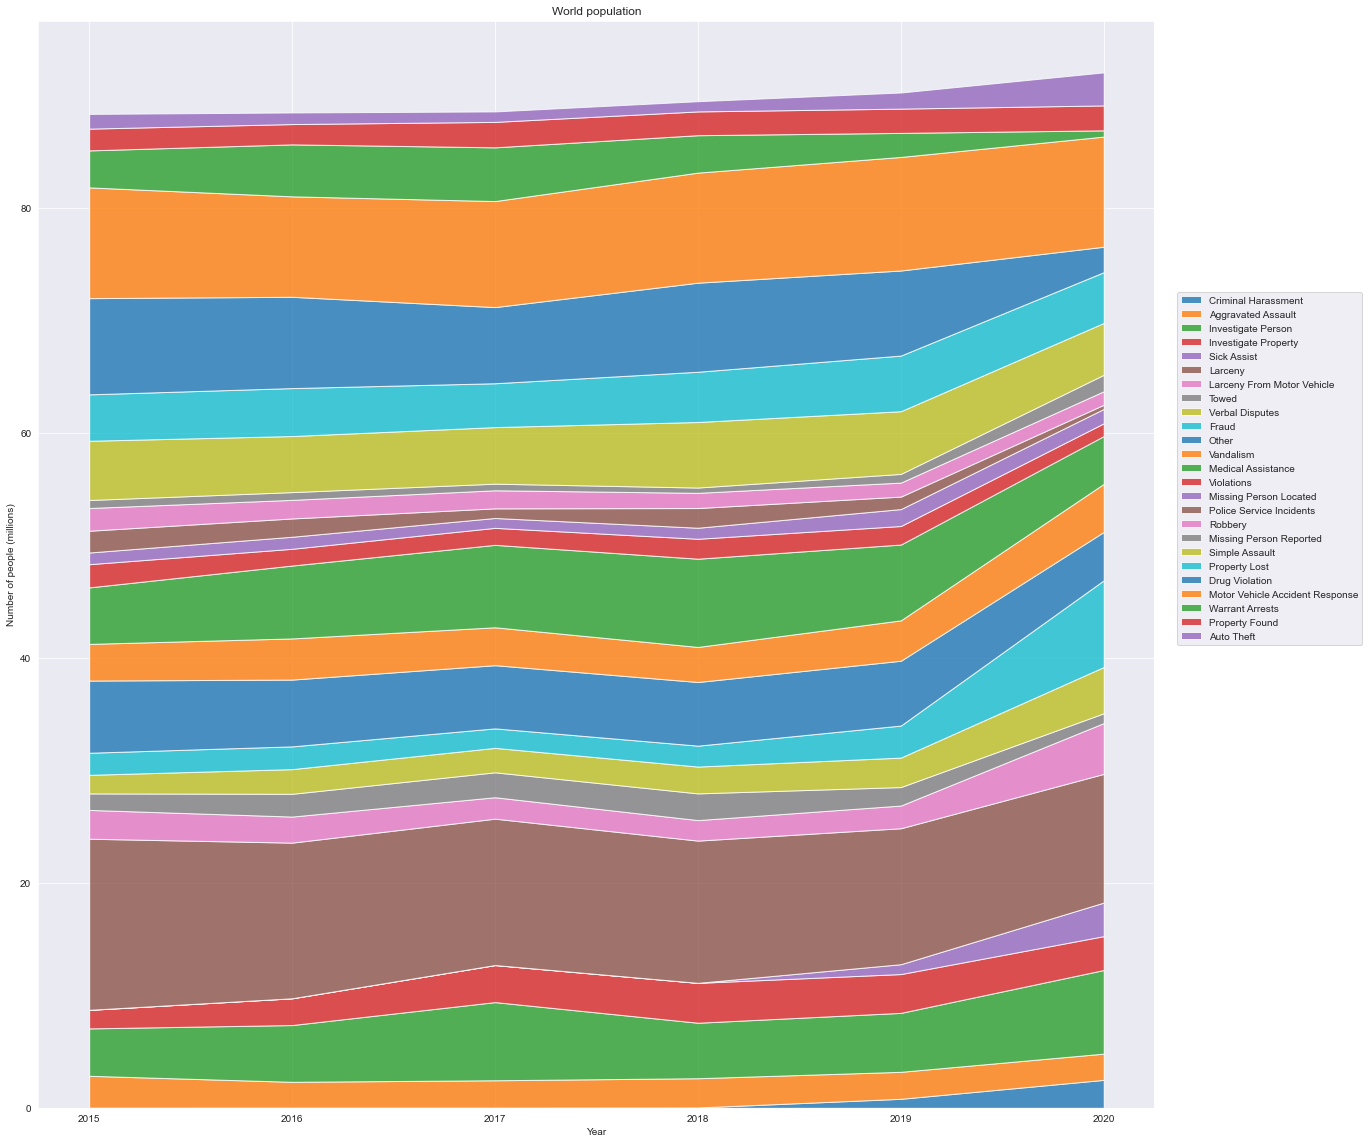

In [245]:
# plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(20, 20))
ax.stackplot(y, a.values(),
             labels=a.keys(), alpha=0.8, cmap='Blues')

ax.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

In [246]:
len(a)

25

In [247]:
tt = fire_nearby_crime_group_2015.groupby(['OFFENSE']).agg({'COUNT': 'max'}).reset_index()
ignore_offense = set(tt[tt['COUNT'] < 200]['OFFENSE'])
ignore_offense

{'Aircraft',
 'Arson',
 'Assembly or Gathering Violations',
 'Auto Theft Recovery',
 'Ballistics',
 'Biological Threat',
 'Bomb Hoax',
 'Breaking And Entering Motor Vehicle',
 'Commercial Burglary',
 'Confidence Games',
 'Counterfeiting',
 'Disorderly Conduct',
 'Embezzlement',
 'Evading Fare',
 'Explosives',
 'Fire Related Reports',
 'Firearm Discovery',
 'Firearm Violations',
 'Fondling - Indecent Assault',
 'Gambling',
 'HOME INVASION',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
 'Harassment',
 'Harbor Related Incidents',
 'Homicide',
 'Landlord/Tenant Disputes',
 'License Plate Related Incidents',
 'License Violation',
 'Liquor Violation',
 'Manslaughter',
 'Offenses Against Child / Family',
 'Operating Under the Influence',
 'Other Burglary',
 'Phone Call Complaints',
 'Prisoner Related Incidents',
 'Property Related Damage',
 'Prostitution',
 'Recovered',
 'Recovered Stolen Property',
 'Residential Burglary',
 'Restraining Order Violations',
 'Search Warrants',
 'Service',
 'S

In [248]:
fire_nearby_crime_group_grid = fire_nearby_crime_group_2015[~fire_nearby_crime_group_2015.OFFENSE.isin(ignore_offense)]
fire_nearby_crime_group_grid

,OFFENSE,YEAR,COUNT
0,Aggravated Assault,2015,199
1,Aggravated Assault,2016,296
2,Aggravated Assault,2017,327
3,Aggravated Assault,2018,358
4,Aggravated Assault,2019,378
...,...,...,...
356,Warrant Arrests,2016,596
357,Warrant Arrests,2017,642
358,Warrant Arrests,2018,458
359,Warrant Arrests,2019,337


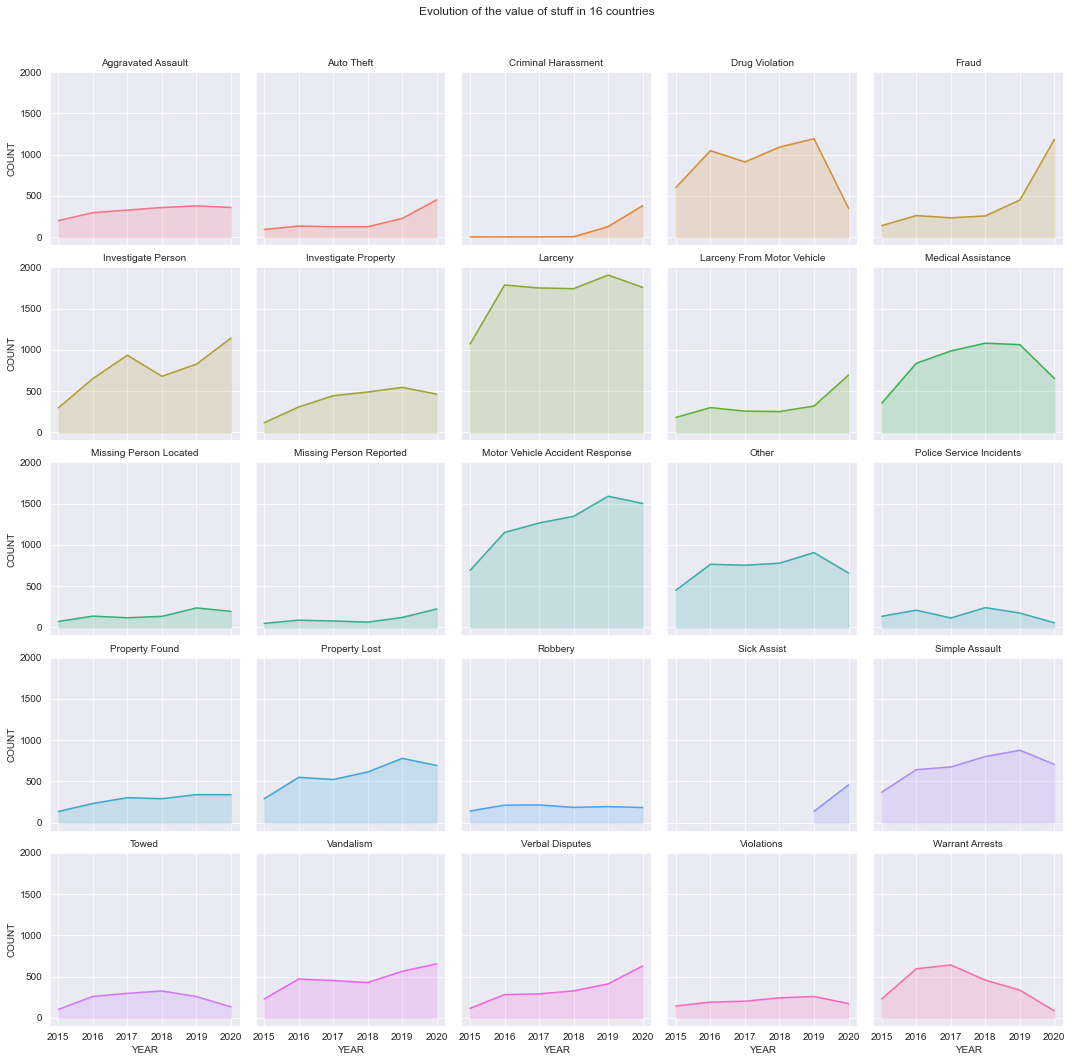

In [249]:
g = sns.FacetGrid(fire_nearby_crime_group_grid, col='OFFENSE', hue='OFFENSE', col_wrap=5, )
g = g.map(plt.plot, 'YEAR', 'COUNT')
g = g.map(plt.fill_between, 'YEAR', 'COUNT', alpha=0.2).set_titles("{col_name} OFFENSE")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')
plt.show()

In [12]:
all_crime = pd.read_csv('data/boston_crime.csv')
all_crime = all_crime[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'YEAR', 'STREET']]
all_crime

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/2119012088.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_crime = pd.read_csv('data/boston_crime.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
0,I152071100,2611,Other,ABDUCTION - INTICING,2015,BERKELEY ST
1,I152054466,2611,Other,ABDUCTION - INTICING,2015,NAZING ST
2,I162018570,2611,Other,ABDUCTION - INTICING,2016,NaN
3,I192018747,2611,Other,ABDUCTION - INTICING,2019,NaN
4,I162001276,2611,Other,ABDUCTION - INTICING,2016,NORFOLK ST
...,...,...,...,...,...,...
525570,202010180,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,PILGRIM RD
525571,202016544,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,ROSEDALE ST
525572,202017756,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,NaN
525573,202007355,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,BLUE HILL AVENUE


In [13]:
fire_nearby_crime = fire_typology.merge(all_crime, left_on='st_loc', right_on='STREET')
fire_nearby_crime

,st_loc,typology,count,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
0,ANNABEL ST,Fire/Police,1,I182081106,423,Aggravated Assault,ASSAULT - AGGRAVATED,2018,ANNABEL ST
1,ANNABEL ST,Fire/Police,1,202022057,801,NaN,ASSAULT - SIMPLE,2020,ANNABEL ST
2,ANNABEL ST,Fire/Police,1,I182092893,802,Simple Assault,ASSAULT SIMPLE - BATTERY,2018,ANNABEL ST
3,ANNABEL ST,Fire/Police,1,I182062029,724,Auto Theft,AUTO THEFT,2018,ANNABEL ST
4,ANNABEL ST,Fire/Police,1,I182025480,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,2018,ANNABEL ST
...,...,...,...,...,...,...,...,...,...
78248,WINTHROP ST,Fire/Police,1,202057401,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,2020,WINTHROP ST
78249,WINTHROP ST,Fire/Police,1,I182011931,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78250,WINTHROP ST,Fire/Police,1,I182098237,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",2018,WINTHROP ST
78251,WINTHROP ST,Fire/Police,1,I192030056,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",2019,WINTHROP ST


In [56]:
code_pair = fire_nearby_crime[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP']]
code_pair.dropna(inplace=True)
code_pair.drop_duplicates(inplace=True)
code_pair

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/1980519068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_pair.dropna(inplace=True)
/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_63975/1980519068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_pair.drop_duplicates(inplace=True)


,OFFENSE_CODE,OFFENSE_CODE_GROUP
0,423,Aggravated Assault
2,802,Simple Assault
3,724,Auto Theft
4,706,Auto Theft
6,1831,Drug Violation
...,...,...
46733,1603,Prostitution
57843,3115,INVESTIGATE PERSON
60902,624,Larceny From Motor Vehicle
68459,2636,Prisoner Related Incidents


In [14]:
fire_nearby_crime_group = fire_nearby_crime.groupby(['OFFENSE_CODE_GROUP', 'YEAR']).size()
fire_nearby_crime_group

OFFENSE_CODE_GROUP  YEAR
Aggravated Assault  2015    199
                    2016    296
                    2017    327
                    2018    358
                    2019    271
                           ... 
Warrant Arrests     2015    231
                    2016    596
                    2017    642
                    2018    458
                    2019    289
Length: 295, dtype: int64

In [20]:
fire_nearby_crime_group_2015 = fire_nearby_crime_group.reset_index()
fire_nearby_crime_group_2015.columns = ['OFFENSE', 'YEAR', 'COUNT']
sum_2015 = fire_nearby_crime_group_2015[fire_nearby_crime_group_2015['YEAR'] == 2015]['COUNT'].sum()
    # fire_nearby_crime_group[fire_nearby_crime_group['YEAR'] == '2015']
fire_nearby_crime_group_2015

,OFFENSE,YEAR,COUNT
0,Aggravated Assault,2015,199
1,Aggravated Assault,2016,296
2,Aggravated Assault,2017,327
3,Aggravated Assault,2018,358
4,Aggravated Assault,2019,271
...,...,...,...
290,Warrant Arrests,2015,231
291,Warrant Arrests,2016,596
292,Warrant Arrests,2017,642
293,Warrant Arrests,2018,458


In [21]:
sum_2015

7028

In [19]:
fire_nearby_crime_group_2015[fire_nearby_crime_group_2015['YEAR'] == 2015]['YEAR']

0      2015
5      2015
6      2015
11     2015
16     2015
21     2015
26     2015
33     2015
38     2015
43     2015
48     2015
53     2015
58     2015
63     2015
68     2015
73     2015
80     2015
85     2015
90     2015
95     2015
105    2015
110    2015
115    2015
120    2015
125    2015
130    2015
135    2015
140    2015
145    2015
150    2015
155    2015
162    2015
167    2015
172    2015
177    2015
182    2015
187    2015
192    2015
197    2015
206    2015
211    2015
216    2015
221    2015
226    2015
231    2015
235    2015
240    2015
245    2015
250    2015
255    2015
260    2015
265    2015
270    2015
275    2015
280    2015
285    2015
290    2015
Name: YEAR, dtype: int64

In [46]:
def extract_offense_group_percentage(nearby_crime_group):
    year = list(range(2015, 2021))
    offenses = set(nearby_crime_group['OFFENSE'])
    offense_by_year = {}
    for offense in offenses:
        count_list = []
        for y in year:
            count = nearby_crime_group[(nearby_crime_group['YEAR'] == y) & (nearby_crime_group['OFFENSE'] == offense)]
            year_sum = nearby_crime_group[nearby_crime_group['YEAR'] == y]['COUNT'].sum()
            if len(count) > 0:
                count_list.append(count.iloc[0, 2] / year_sum * 100)
            else:
                count_list.append(0)
        offense_by_year[offense] = count_list
    return year, offense_by_year

y, a = extract_offense_group_percentage(fire_nearby_crime_group_2015)
a

{'Arson': [0.014228799089356859,
  0.038753681599751975,
  0.007438815740534108,
  0.029052876234747237,
  0.018857250612860643,
  0],
 'Criminal Harassment': [0.014228799089356859,
  0.015501472639900789,
  0.014877631481068215,
  0.029052876234747237,
  0.009428625306430322,
  0],
 'Aggravated Assault': [2.8315310187820146,
  2.294217950705317,
  2.432492747154653,
  2.600232423009878,
  2.5551574580426175,
  0],
 'Ballistics': [0.22766078542970974,
  0.1782669353588591,
  0.17853157777281856,
  0.152527600232423,
  0.16971525551574582,
  0],
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': [0,
  0,
  0.007438815740534108,
  0,
  0,
  0],
 'Prisoner Related Incidents': [0.1707455890722823,
  0.13951325375910711,
  0.15621513055121625,
  0.10894828588030214,
  0.11314350367716387,
  0],
 'Investigate Person': [4.21172453044963,
  5.045729344287707,
  6.940415085918322,
  4.931725740848344,
  4.931171035263058,
  0],
 'Counterfeiting': [0.7683551508252703,
  0.9223376220740971,
  0.684371

In [23]:
a = list(range(2015, 2021))
a

[2015, 2016, 2017, 2018, 2019, 2020]

<Figure size 504x720 with 0 Axes>

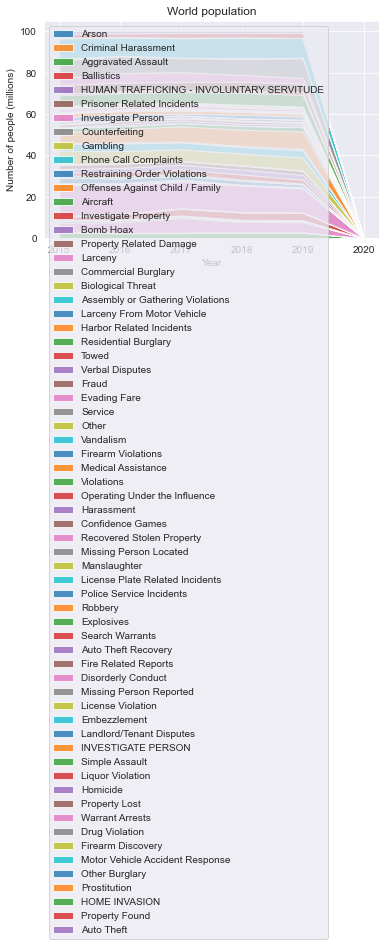

In [47]:
plt.figure(figsize=(7, 10))
fig, ax = plt.subplots()
ax.stackplot(y, a.values(),
             labels=a.keys(), alpha=0.8)

ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

In [48]:
fire_nearby_crime[fire_nearby_crime['YEAR'] == 2020]

,st_loc,typology,count,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,STREET
1,ANNABEL ST,Fire/Police,1,202022057,801,NaN,ASSAULT - SIMPLE,2020,ANNABEL ST
7,ANNABEL ST,Fire/Police,1,202064030,617,NaN,LARCENY THEFT FROM BUILDING,2020,ANNABEL ST
15,ANNABEL ST,Fire/Police,1,202047263,3802,NaN,M/V ACCIDENT - PROPERTY DAMAGE,2020,ANNABEL ST
30,ANNABEL ST,Fire/Police,1,202036392,3005,NaN,SICK ASSIST,2020,ANNABEL ST
35,ANNABEL ST,Fire/Police,1,202064121,2647,NaN,THREATS TO DO BODILY HARM,2020,ANNABEL ST
...,...,...,...,...,...,...,...,...,...
78221,WINTHROP ST,Fire/Police,1,202023973,3301,NaN,VERBAL DISPUTE,2020,WINTHROP ST
78222,WINTHROP ST,Fire/Police,1,202041025,3301,NaN,VERBAL DISPUTE,2020,WINTHROP ST
78223,WINTHROP ST,Fire/Police,1,202025375,3301,NaN,VERBAL DISPUTE,2020,WINTHROP ST
78224,WINTHROP ST,Fire/Police,1,202021351,3301,NaN,VERBAL DISPUTE,2020,WINTHROP ST


In [50]:
set(fire_nearby_crime.OFFENSE_CODE)

{111,
 121,
 241,
 244,
 261,
 301,
 311,
 349,
 351,
 361,
 371,
 381,
 402,
 403,
 413,
 423,
 520,
 521,
 522,
 530,
 531,
 540,
 541,
 542,
 560,
 561,
 562,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 624,
 633,
 641,
 670,
 706,
 724,
 727,
 735,
 736,
 801,
 802,
 804,
 900,
 1001,
 1102,
 1105,
 1106,
 1107,
 1108,
 1109,
 1201,
 1300,
 1304,
 1402,
 1415,
 1501,
 1502,
 1503,
 1504,
 1510,
 1601,
 1602,
 1603,
 1620,
 1722,
 1805,
 1806,
 1810,
 1815,
 1825,
 1830,
 1831,
 1832,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1863,
 1864,
 1866,
 1870,
 1874,
 1901,
 2003,
 2004,
 2005,
 2006,
 2007,
 2010,
 2101,
 2102,
 2204,
 2401,
 2403,
 2405,
 2407,
 2511,
 2604,
 2605,
 2606,
 2608,
 2610,
 2612,
 2613,
 2616,
 2617,
 2618,
 2619,
 2622,
 2623,
 2628,
 2629,
 2631,
 2632,
 2636,
 2641,
 2642,
 2646,
 2647,
 2648,
 2657,
 2660,
 2662,
 2663,
 2664,
 2670,
 2671,
 2672,
 2900,
 2905,
 2906,
 2907,
 2914,
 3001,
 3002,
 3004,
 3005,
 3006,